# Arrow Support in Smith Charts

This notebook demonstrates the arrow functionality available in pysmithchart for visualizing direction and flow on Smith charts.

**Arrow support is available in:**
- `plot()` - Main plotting function
- `plot_constant_resistance()` - Resistance circles
- `plot_constant_reactance()` - Reactance arcs  
- `plot_constant_conductance()` - Conductance circles (admittance)
- `plot_constant_susceptance()` - Susceptance arcs (admittance)
- `plot_vswr()` - VSWR circles
- `plot_rotation_path()` - Matching paths

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("pysmithchart")

from pysmithchart import REFLECTANCE_DOMAIN, IMPEDANCE_DOMAIN, ADMITTANCE_DOMAIN

## Basic Arrow Usage with `ax.plot()`

The simplest way to add arrows is with the `arrow` parameter.

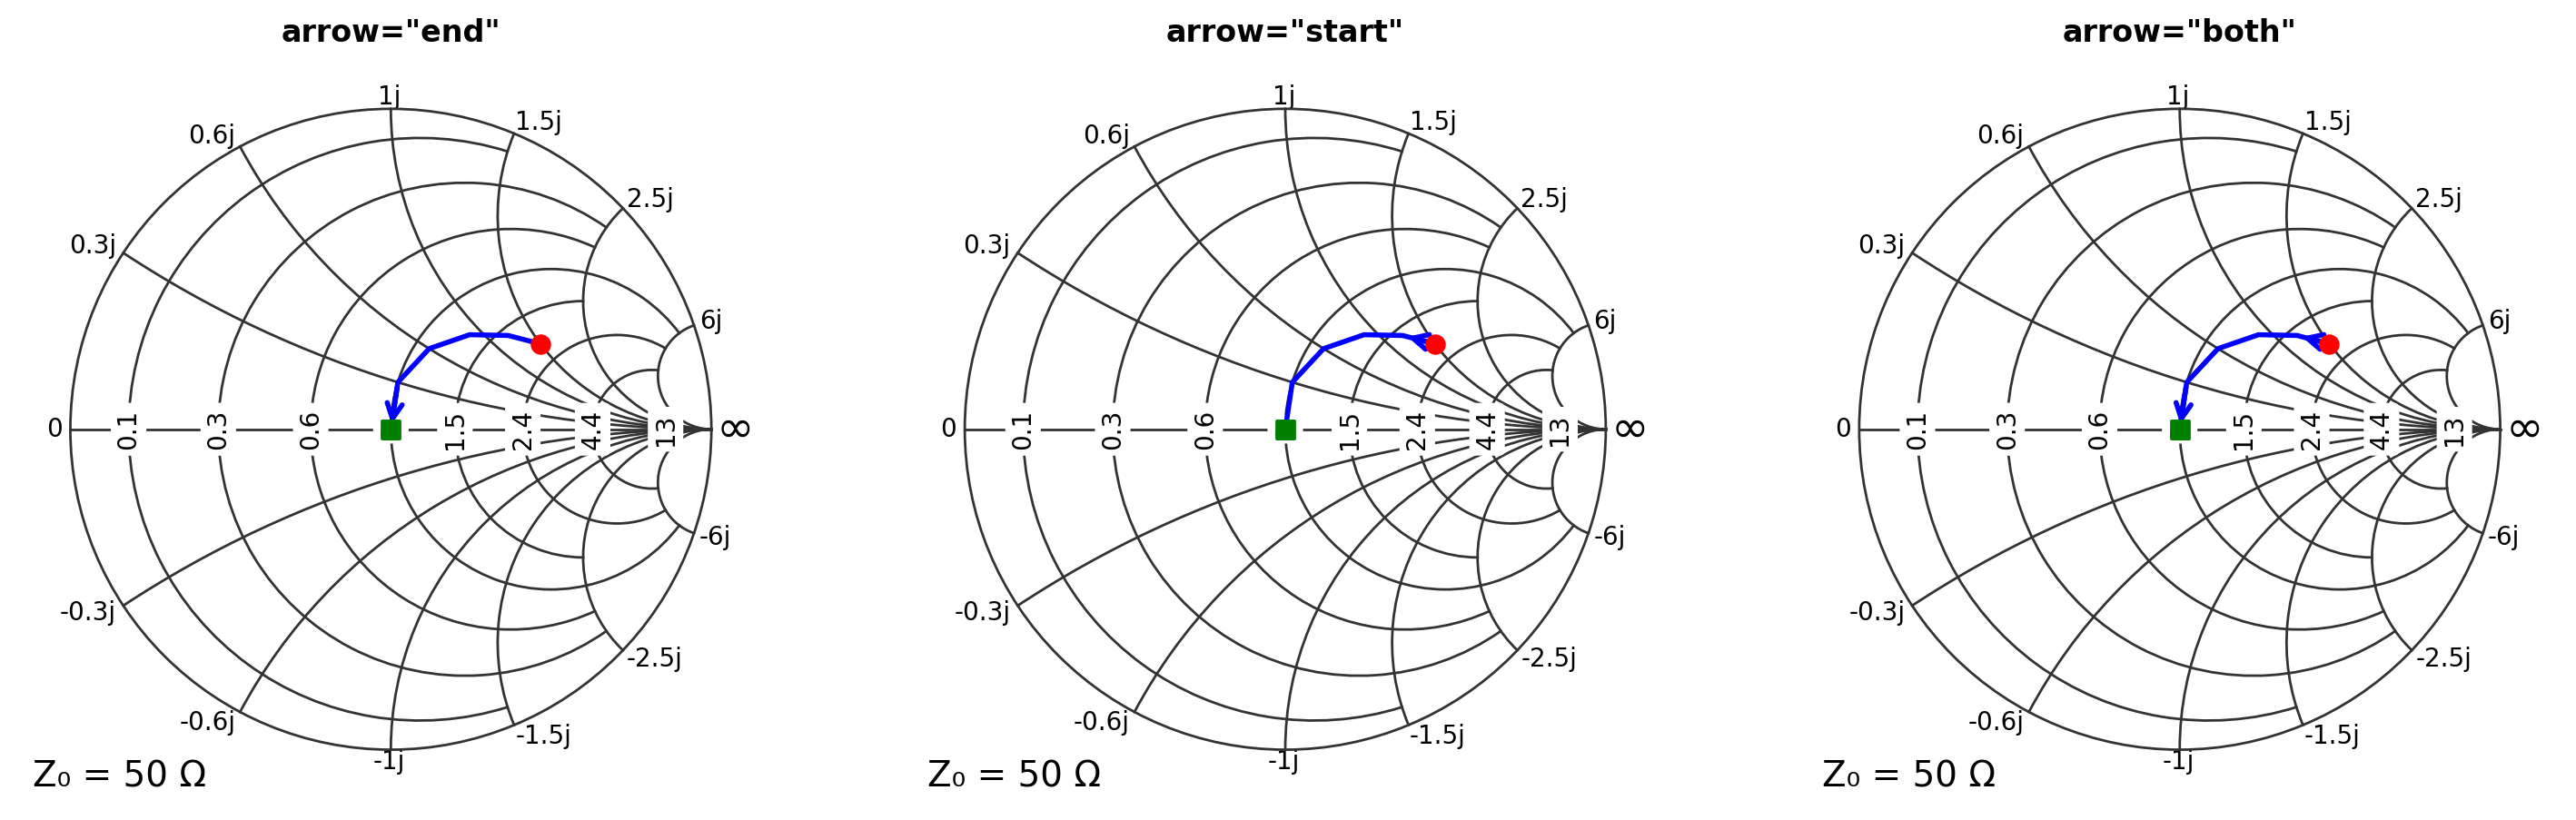

In [2]:
Z = np.array([100 + 75j, 80 + 60j, 65 + 45j, 55 + 30j, 50 + 15j, 50 + 0j])

plt.figure(figsize=(18, 6))

# Arrow at end
ax = plt.subplot(131, projection="smith")
ax.plot(Z, "b", linewidth=2, arrow="end")
ax.scatter(Z[0], c="red", s=50, marker="o", label="Start", zorder=10)
ax.scatter(Z[-1], c="green", s=50, marker="s", label="End", zorder=10)
ax.set_title('arrow="end"', fontsize=12, fontweight="bold")

# Arrow at start
ax = plt.subplot(132, projection="smith")
ax.plot(Z, "b", linewidth=2, arrow="start")
ax.scatter(Z[0], c="red", s=50, marker="o", label="Start", zorder=10)
ax.scatter(Z[-1], c="green", s=50, marker="s", label="End", zorder=10)
ax.set_title('arrow="start"', fontsize=12, fontweight="bold")

# Arrows at both ends
ax = plt.subplot(133, projection="smith")
ax.plot(Z, "b", linewidth=2, arrow="both")
ax.scatter(Z[0], c="red", s=50, marker="o", label="Start")
ax.scatter(Z[-1], c="green", s=50, marker="s", label="End")
ax.set_title('arrow="both"', fontsize=12, fontweight="bold")

plt.show()

## Custom Arrow Styles

Use a dictionary for full control over arrow appearance.

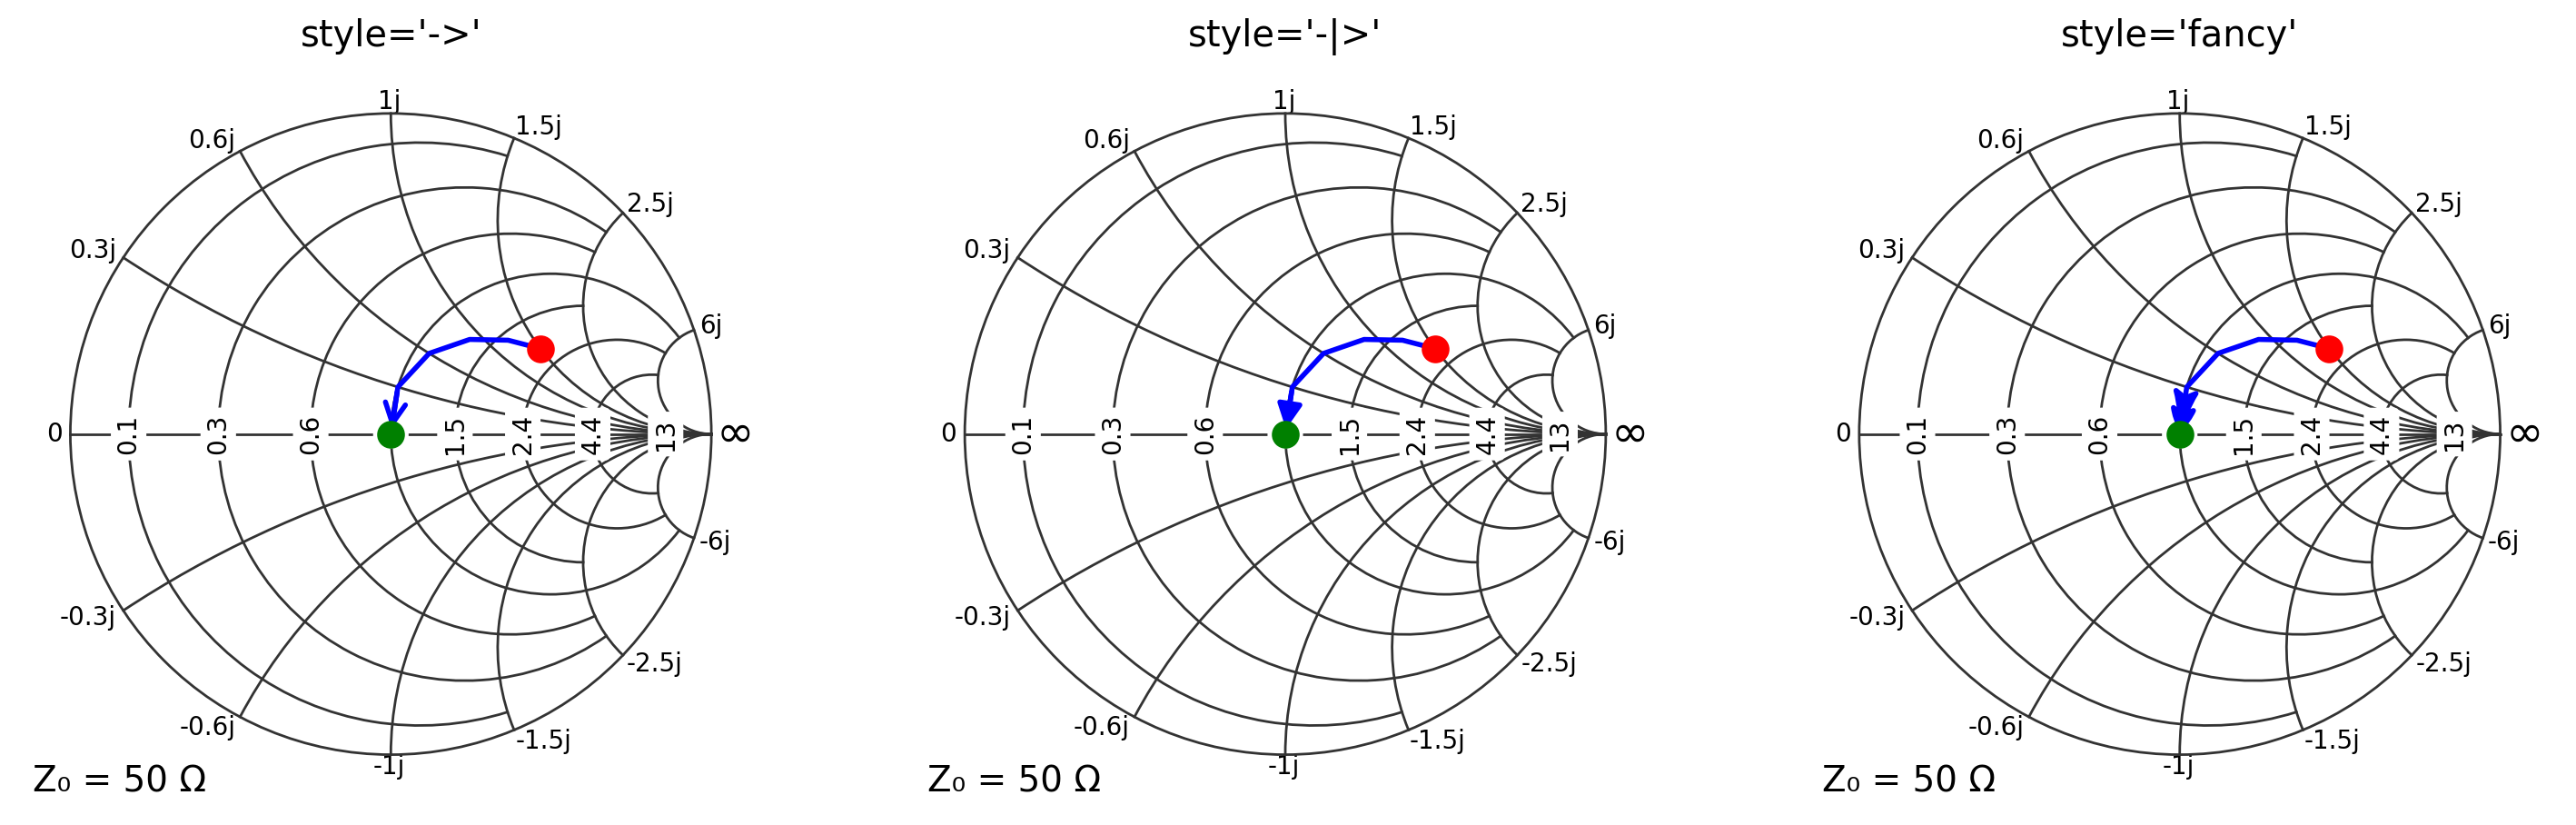

In [3]:
Z = np.array([100 + 75j, 80 + 60j, 65 + 45j, 55 + 30j, 50 + 15j, 50 + 0j])

arrow_styles = [("->", "Standard"), ("-|>", "Fancy"), ("fancy", "Fancy Arrow")]

plt.figure(figsize=(18, 6))
for i, tuple in enumerate(arrow_styles):
    style, name = tuple
    arrow_dict = {"position": "end", "style": style, "size": 20}
    ax = plt.subplot(1, 3, i + 1, projection="smith")
    ax.plot(Z, "b-", linewidth=2, arrow=arrow_dict)
    ax.scatter(Z[0], c="red", s=100, marker="o")
    ax.scatter(Z[-1], c="green", s=100, marker="o")
    ax.set_title(f"style='{style}'")

plt.show()

## Arrow Size Control

Adjust arrow size for visibility and aesthetics.

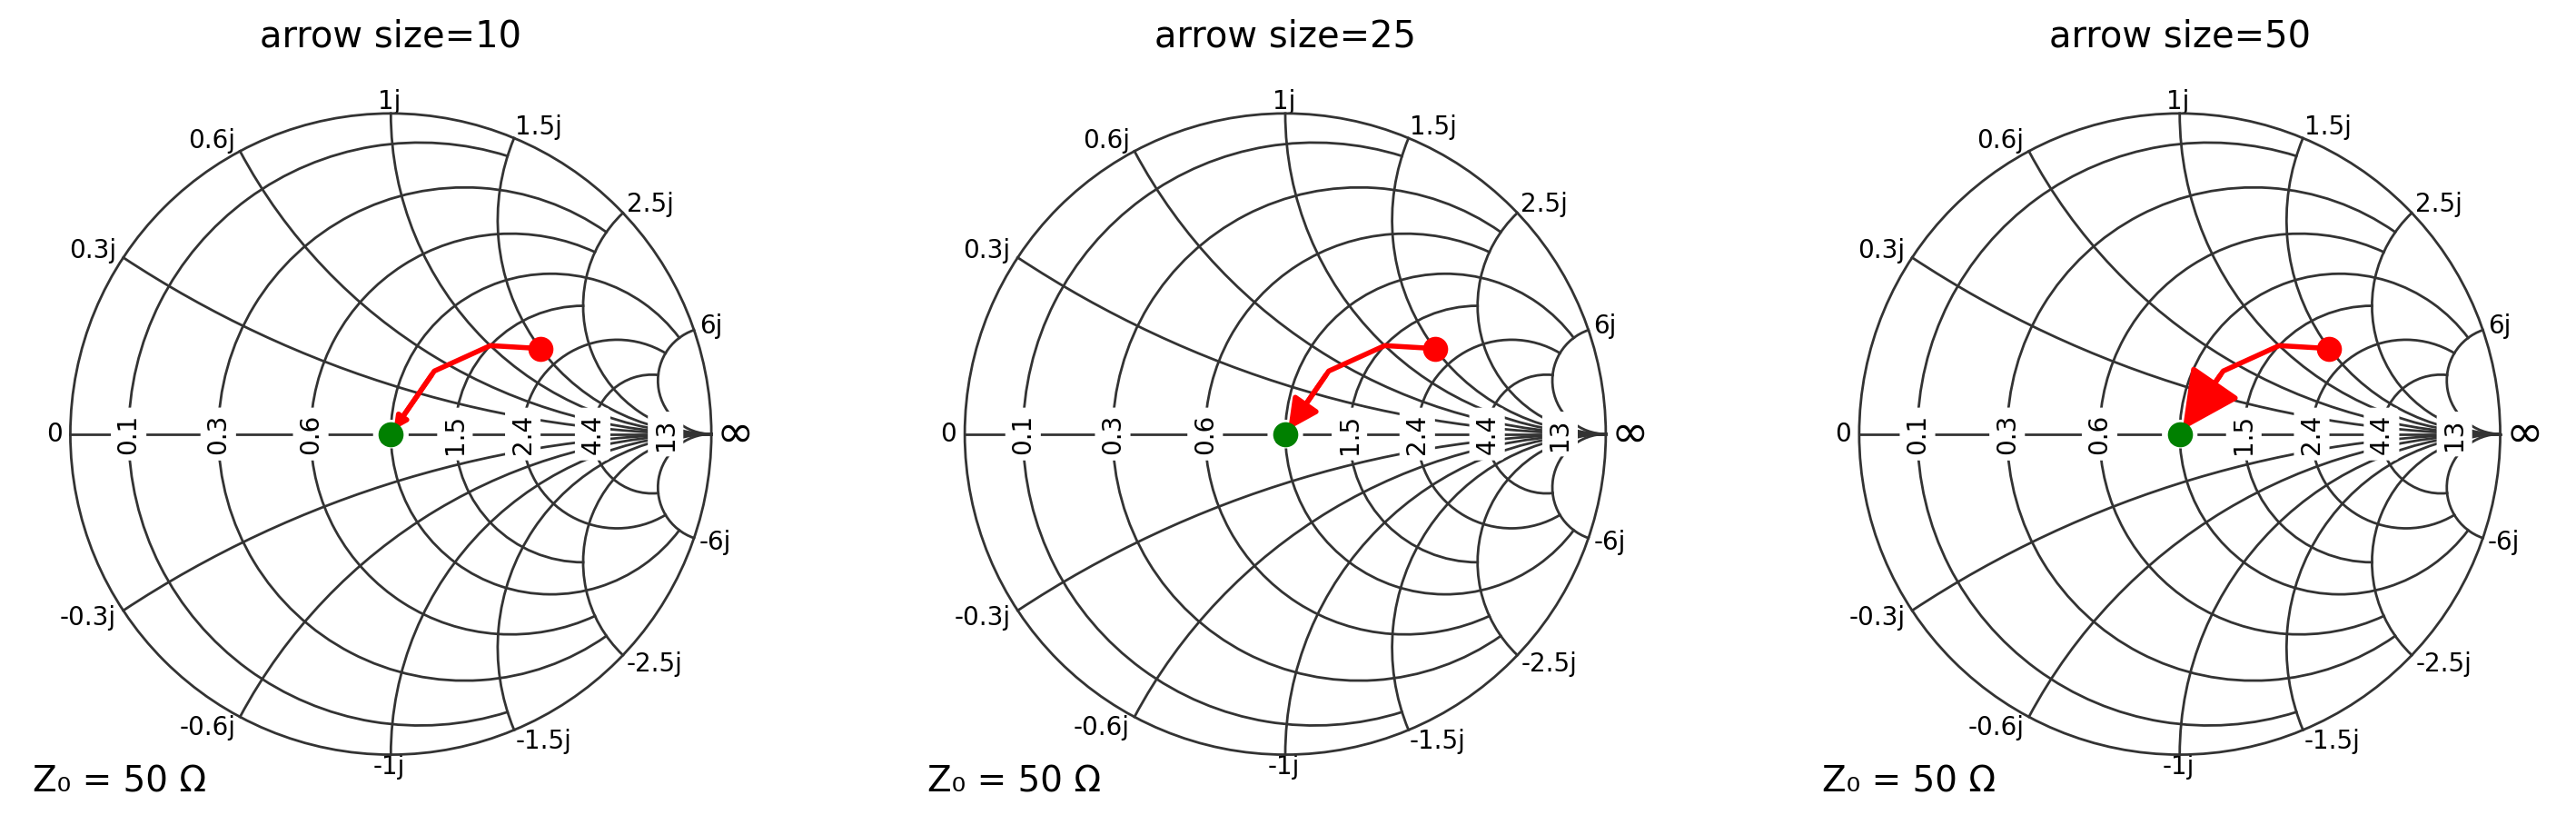

In [4]:
Z = np.array([100 + 75j, 75 + 50j, 60 + 25j, 50 + 0j])
sizes = [10, 25, 50]

plt.figure(figsize=(18, 6))
for i, size in enumerate(sizes):
    arrow_dict = {"position": "end", "style": "-|>", "size": size}
    ax = plt.subplot(1, 3, i + 1, projection="smith")
    ax.plot(Z, "r-", linewidth=2, arrow=arrow_dict)
    ax.scatter(Z[0], c="red", s=80, marker="o")
    ax.scatter(Z[-1], c="green", s=80, marker="o")
    ax.set_title(f"arrow size={size}")
plt.show()

## Arrows on Constant Resistance Circles

Show increasing reactance direction on resistance circles.  He we range from -150j to +150j (or normalized from -3j to +3j).

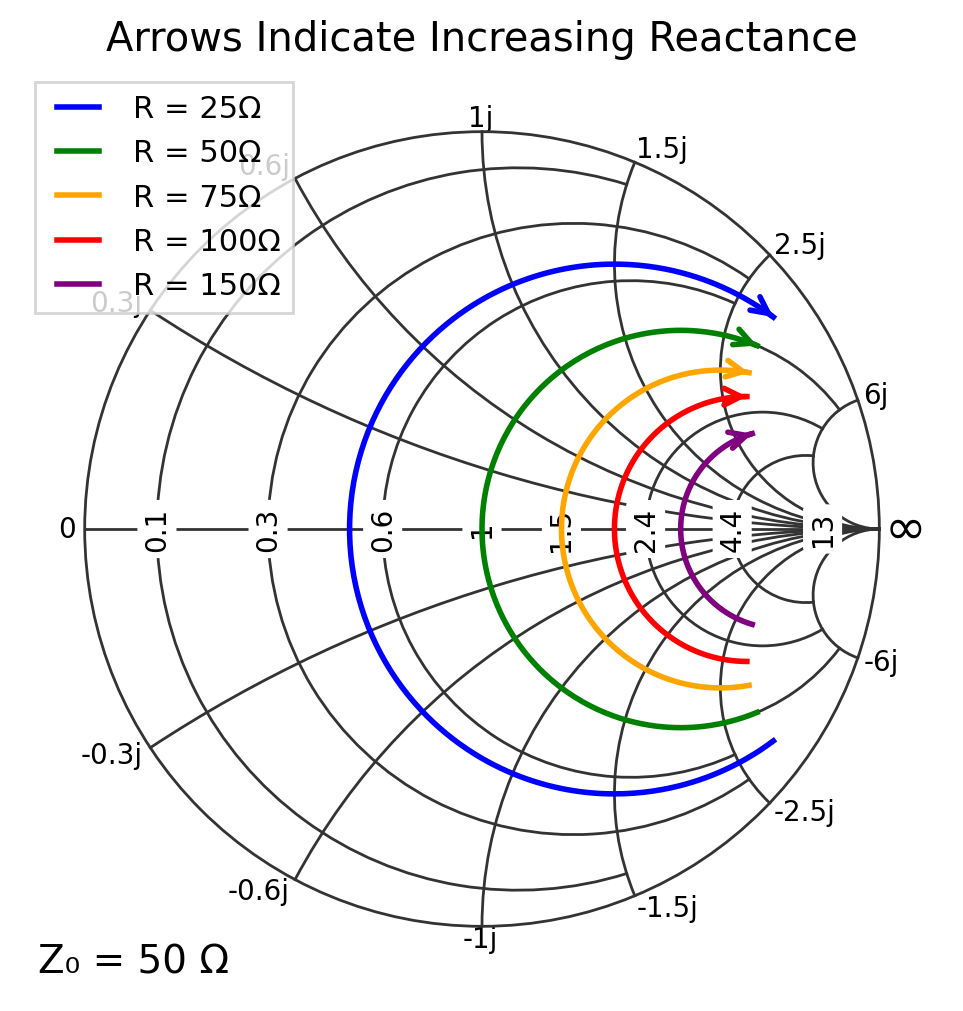

In [5]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")

resistances = [25, 50, 75, 100, 150]
colors = ["blue", "green", "orange", "red", "purple"]

for R, color in zip(resistances, colors):
    ax.plot_constant_resistance(
        R, color=color, ms=0, linestyle="-", linewidth=2, reactance_range=(-150, 150), arrow="end", label=f"R = {R}Ω"
    )

ax.legend(loc="upper left", fontsize=11)
ax.set_title("Arrows Indicate Increasing Reactance")
plt.show()

## Arrows on Constant Reactance Arcs

Show increasing resistance direction on reactance arcs.

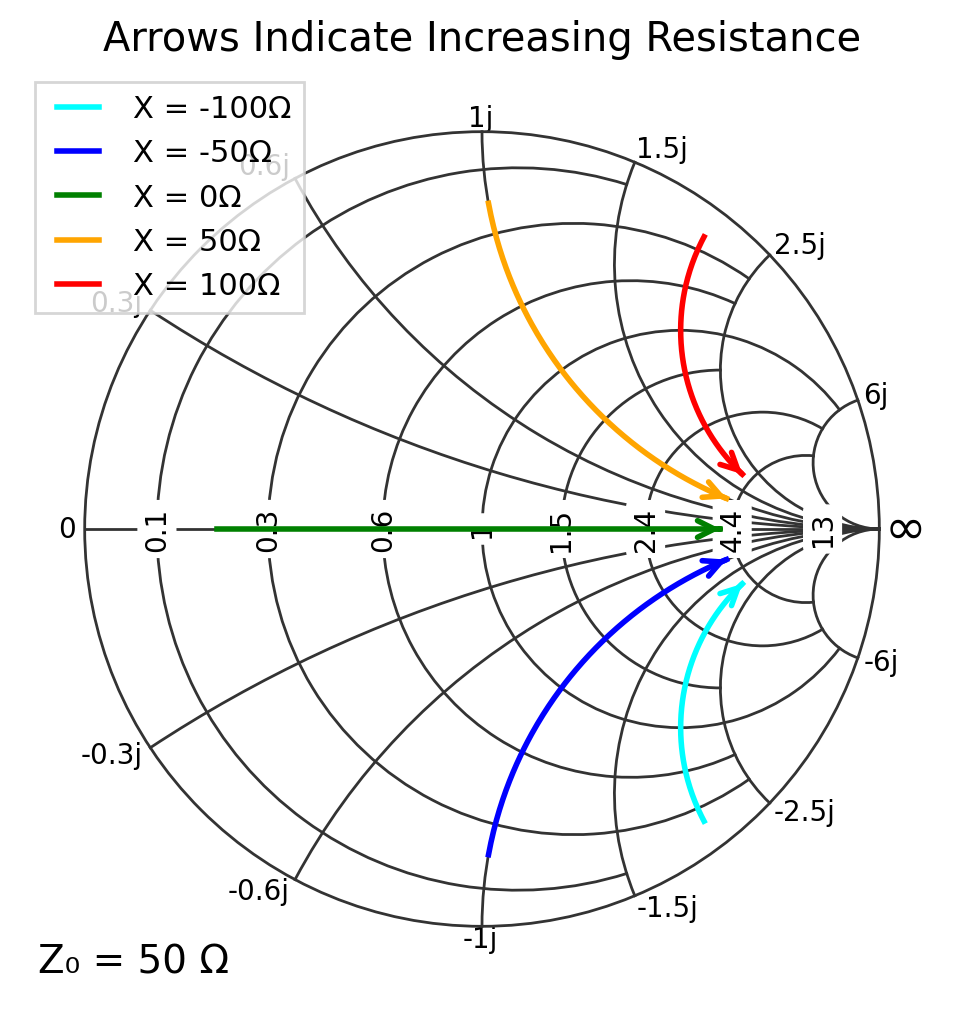

In [6]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")

reactances = [-100, -50, 0, 50, 100]
colors = ["cyan", "blue", "green", "orange", "red"]

for X, color in zip(reactances, colors):
    label = f"X = {X}Ω"
    ax.plot_constant_reactance(
        X, color=color, ms=0, ls="-", linewidth=2, resistance_range=(10, 200), arrow="end", label=label
    )

ax.legend(loc="upper left", fontsize=11)
ax.set_title("Arrows Indicate Increasing Resistance")
plt.show()

## Admittance Arrows

Arrows work on admittance lines too!

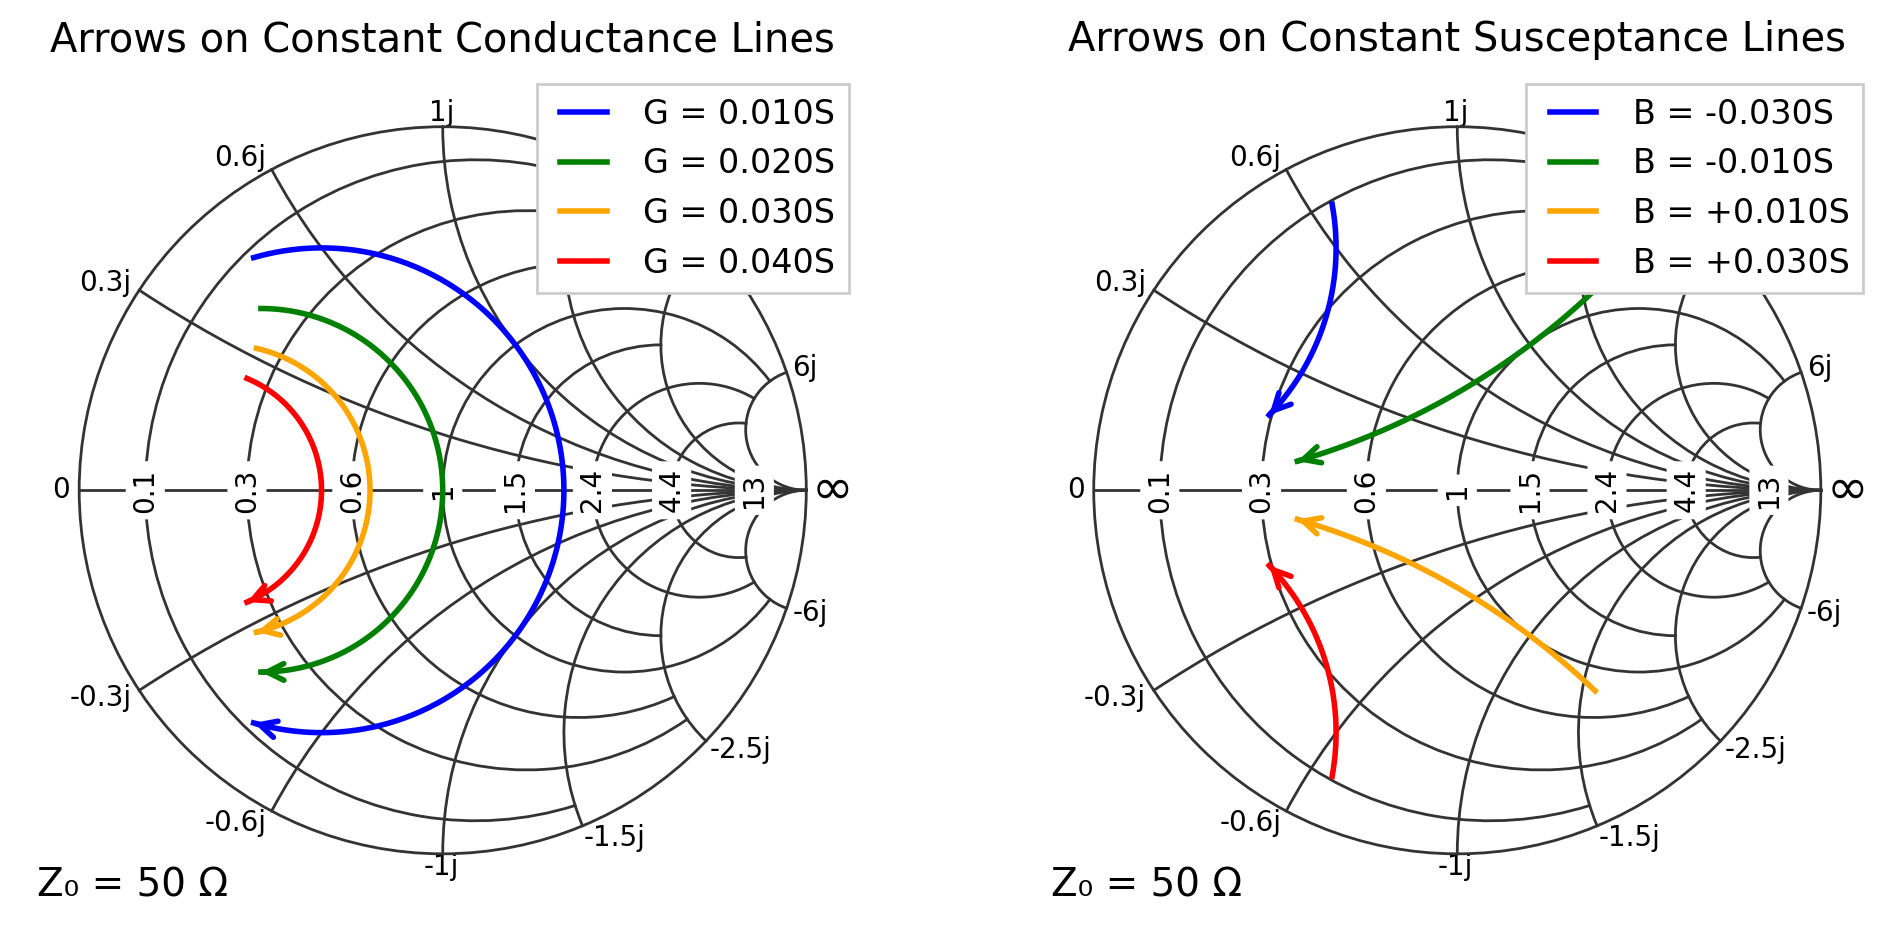

In [7]:
conductances = [0.01, 0.02, 0.03, 0.04]  # Siemens
colors = ["blue", "green", "orange", "red"]

plt.figure(figsize=(12, 6))

# Plot constant conductance arcs
ax = plt.subplot(121, projection="smith", domain=ADMITTANCE_DOMAIN)
for G, color in zip(conductances, colors):
    ax.plot_constant_conductance(
        G,
        color=color,
        ms=0,
        lw=2,
        susceptance_range=(-0.04, 0.04),
        arrow="end",
        label=f"G = {G:.3f}S",
    )
ax.legend(loc="upper right", framealpha=1)
ax.set_title("Arrows on Constant Conductance Lines")

# Plot constant susceptance arcs
susceptances = [-0.03, -0.01, 0.01, 0.03]

ax = plt.subplot(122, projection="smith", domain=ADMITTANCE_DOMAIN)
for B, color in zip(susceptances, colors):
    ax.plot_constant_susceptance(
        B, color=color, ms=0, lw=2, conductance_range=(0.005, 0.05), arrow="end", label=f"B = {B:+.3f}S"
    )

ax.legend(loc="upper right", framealpha=1)
ax.set_title("Arrows on Constant Susceptance Lines")
plt.show()

## Arrows on VSWR Circles

Show rotation direction along transmission line.

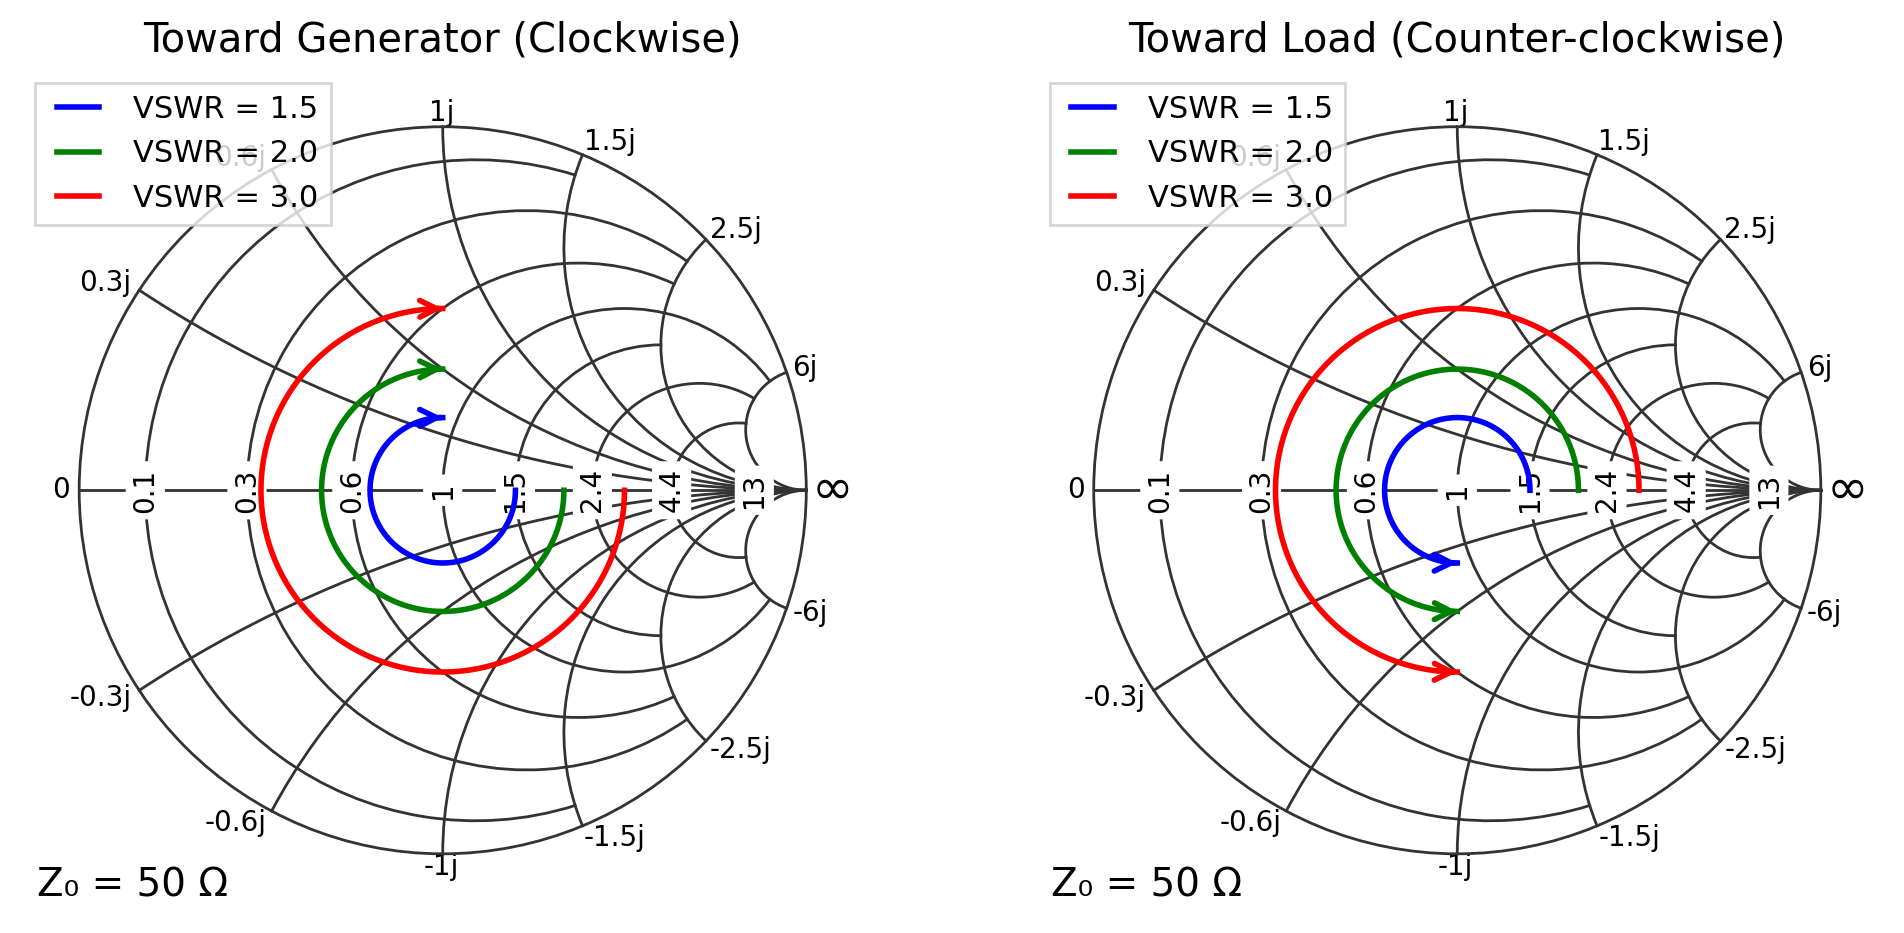

In [8]:
plt.figure(figsize=(12, 6))

vswr_values = [1.5, 2.0, 3.0]
colors = ["blue", "green", "red"]

# Clockwise rotation (toward generator)
ax = plt.subplot(121, projection="smith")
for vswr, color in zip(vswr_values, colors):
    ax.plot_vswr(
        vswr, color=color, ms=0, ls="-", linewidth=2, angle_range=(0, -270), arrow="end", label=f"VSWR = {vswr}"
    )

ax.legend(loc="upper left", fontsize=11)
ax.set_title("Toward Generator (Clockwise)")

# Counter-clockwise rotation (toward load)
ax = plt.subplot(122, projection="smith")
for vswr, color in zip(vswr_values, colors):
    ax.plot_vswr(
        vswr, color=color, ms=0, ls="-", linewidth=2, angle_range=(0, 270), arrow="end", label=f"VSWR = {vswr}"
    )

ax.legend(loc="upper left", fontsize=11)
ax.set_title("Toward Load (Counter-clockwise)")
plt.show()

## Arrows on Matching Paths

Visualize impedance matching networks with directional arrows.

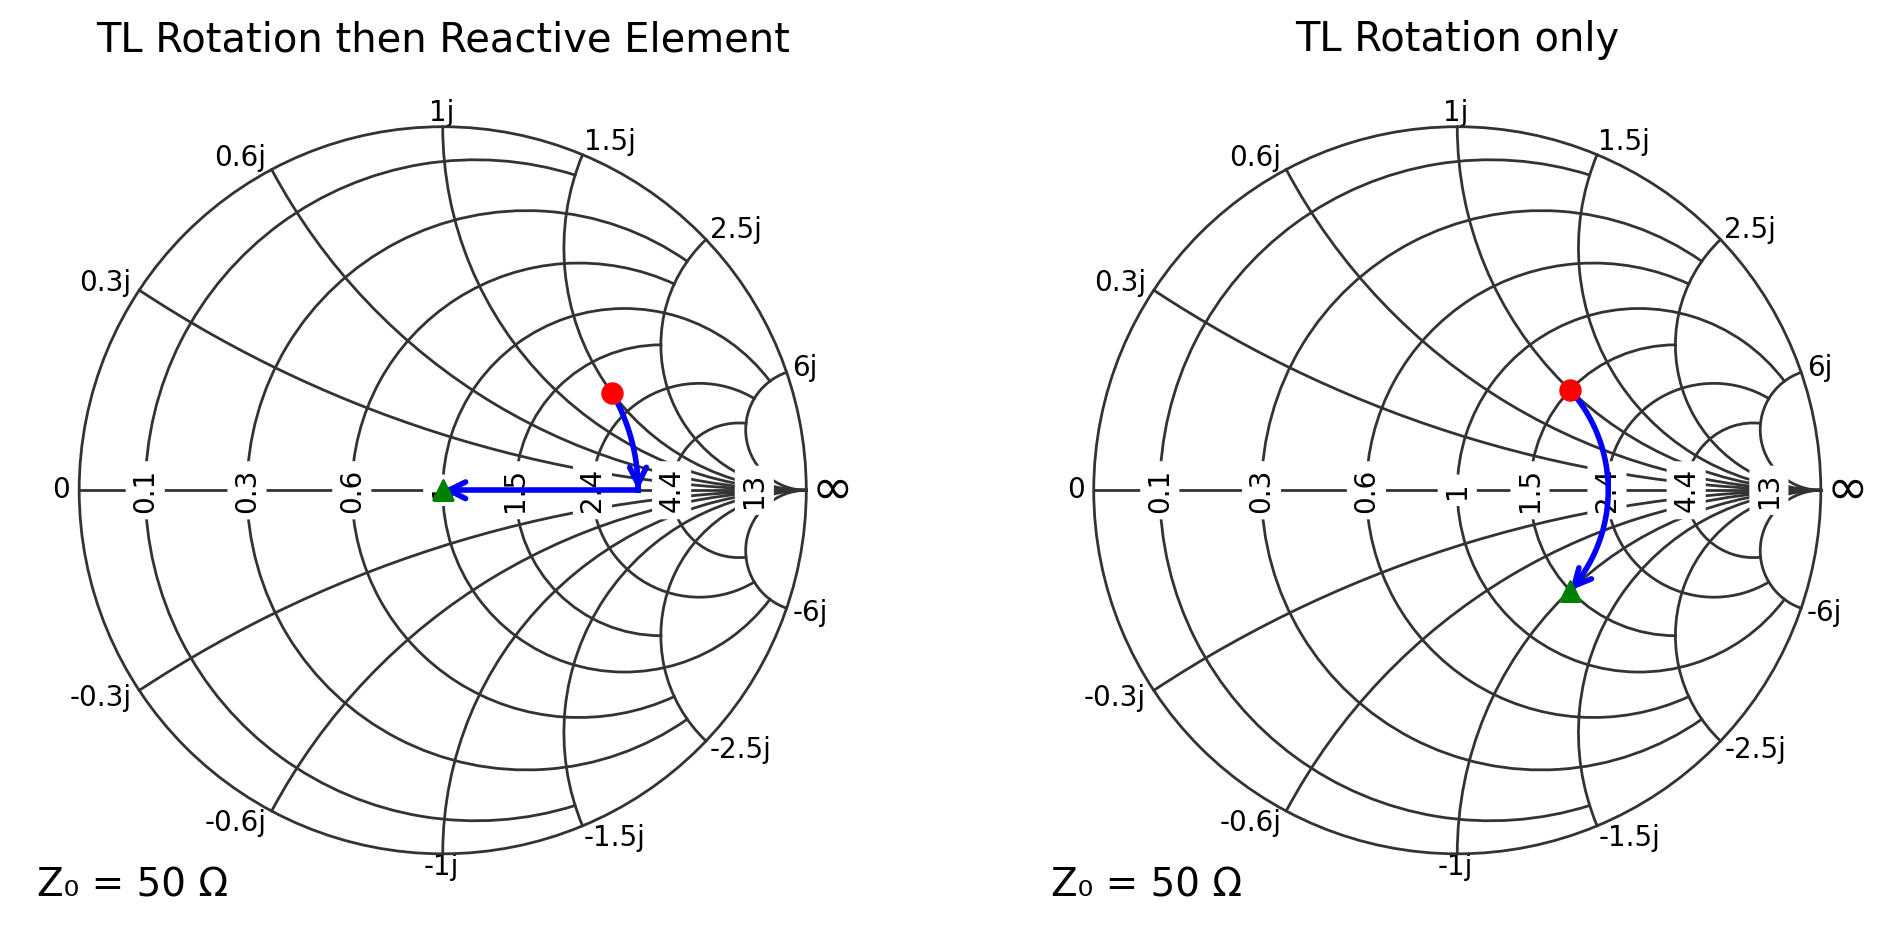

In [9]:
Z_load = 100 + 75j
Z_matched = 50 + 0j

plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection="smith")
ax.plot_rotation_path(Z_load, Z_matched, "b-", linewidth=2, arrow="end")
ax.scatter(Z_load, c="red", s=50, marker="o")
ax.scatter(Z_matched, c="green", s=50, marker="^")
ax.set_title("TL Rotation then Reactive Element")

Z_load = 75 + 50j
Z_matched = 75 - 50j  # Same VSWR

ax = plt.subplot(122, projection="smith")
ax.plot_rotation_path(Z_load, Z_matched, "b-", linewidth=2, arrow="end")
ax.scatter(Z_load, c="red", s=50, marker="o")
ax.scatter(Z_matched, c="green", s=50, marker="^")
ax.set_title("TL Rotation only")
plt.show()

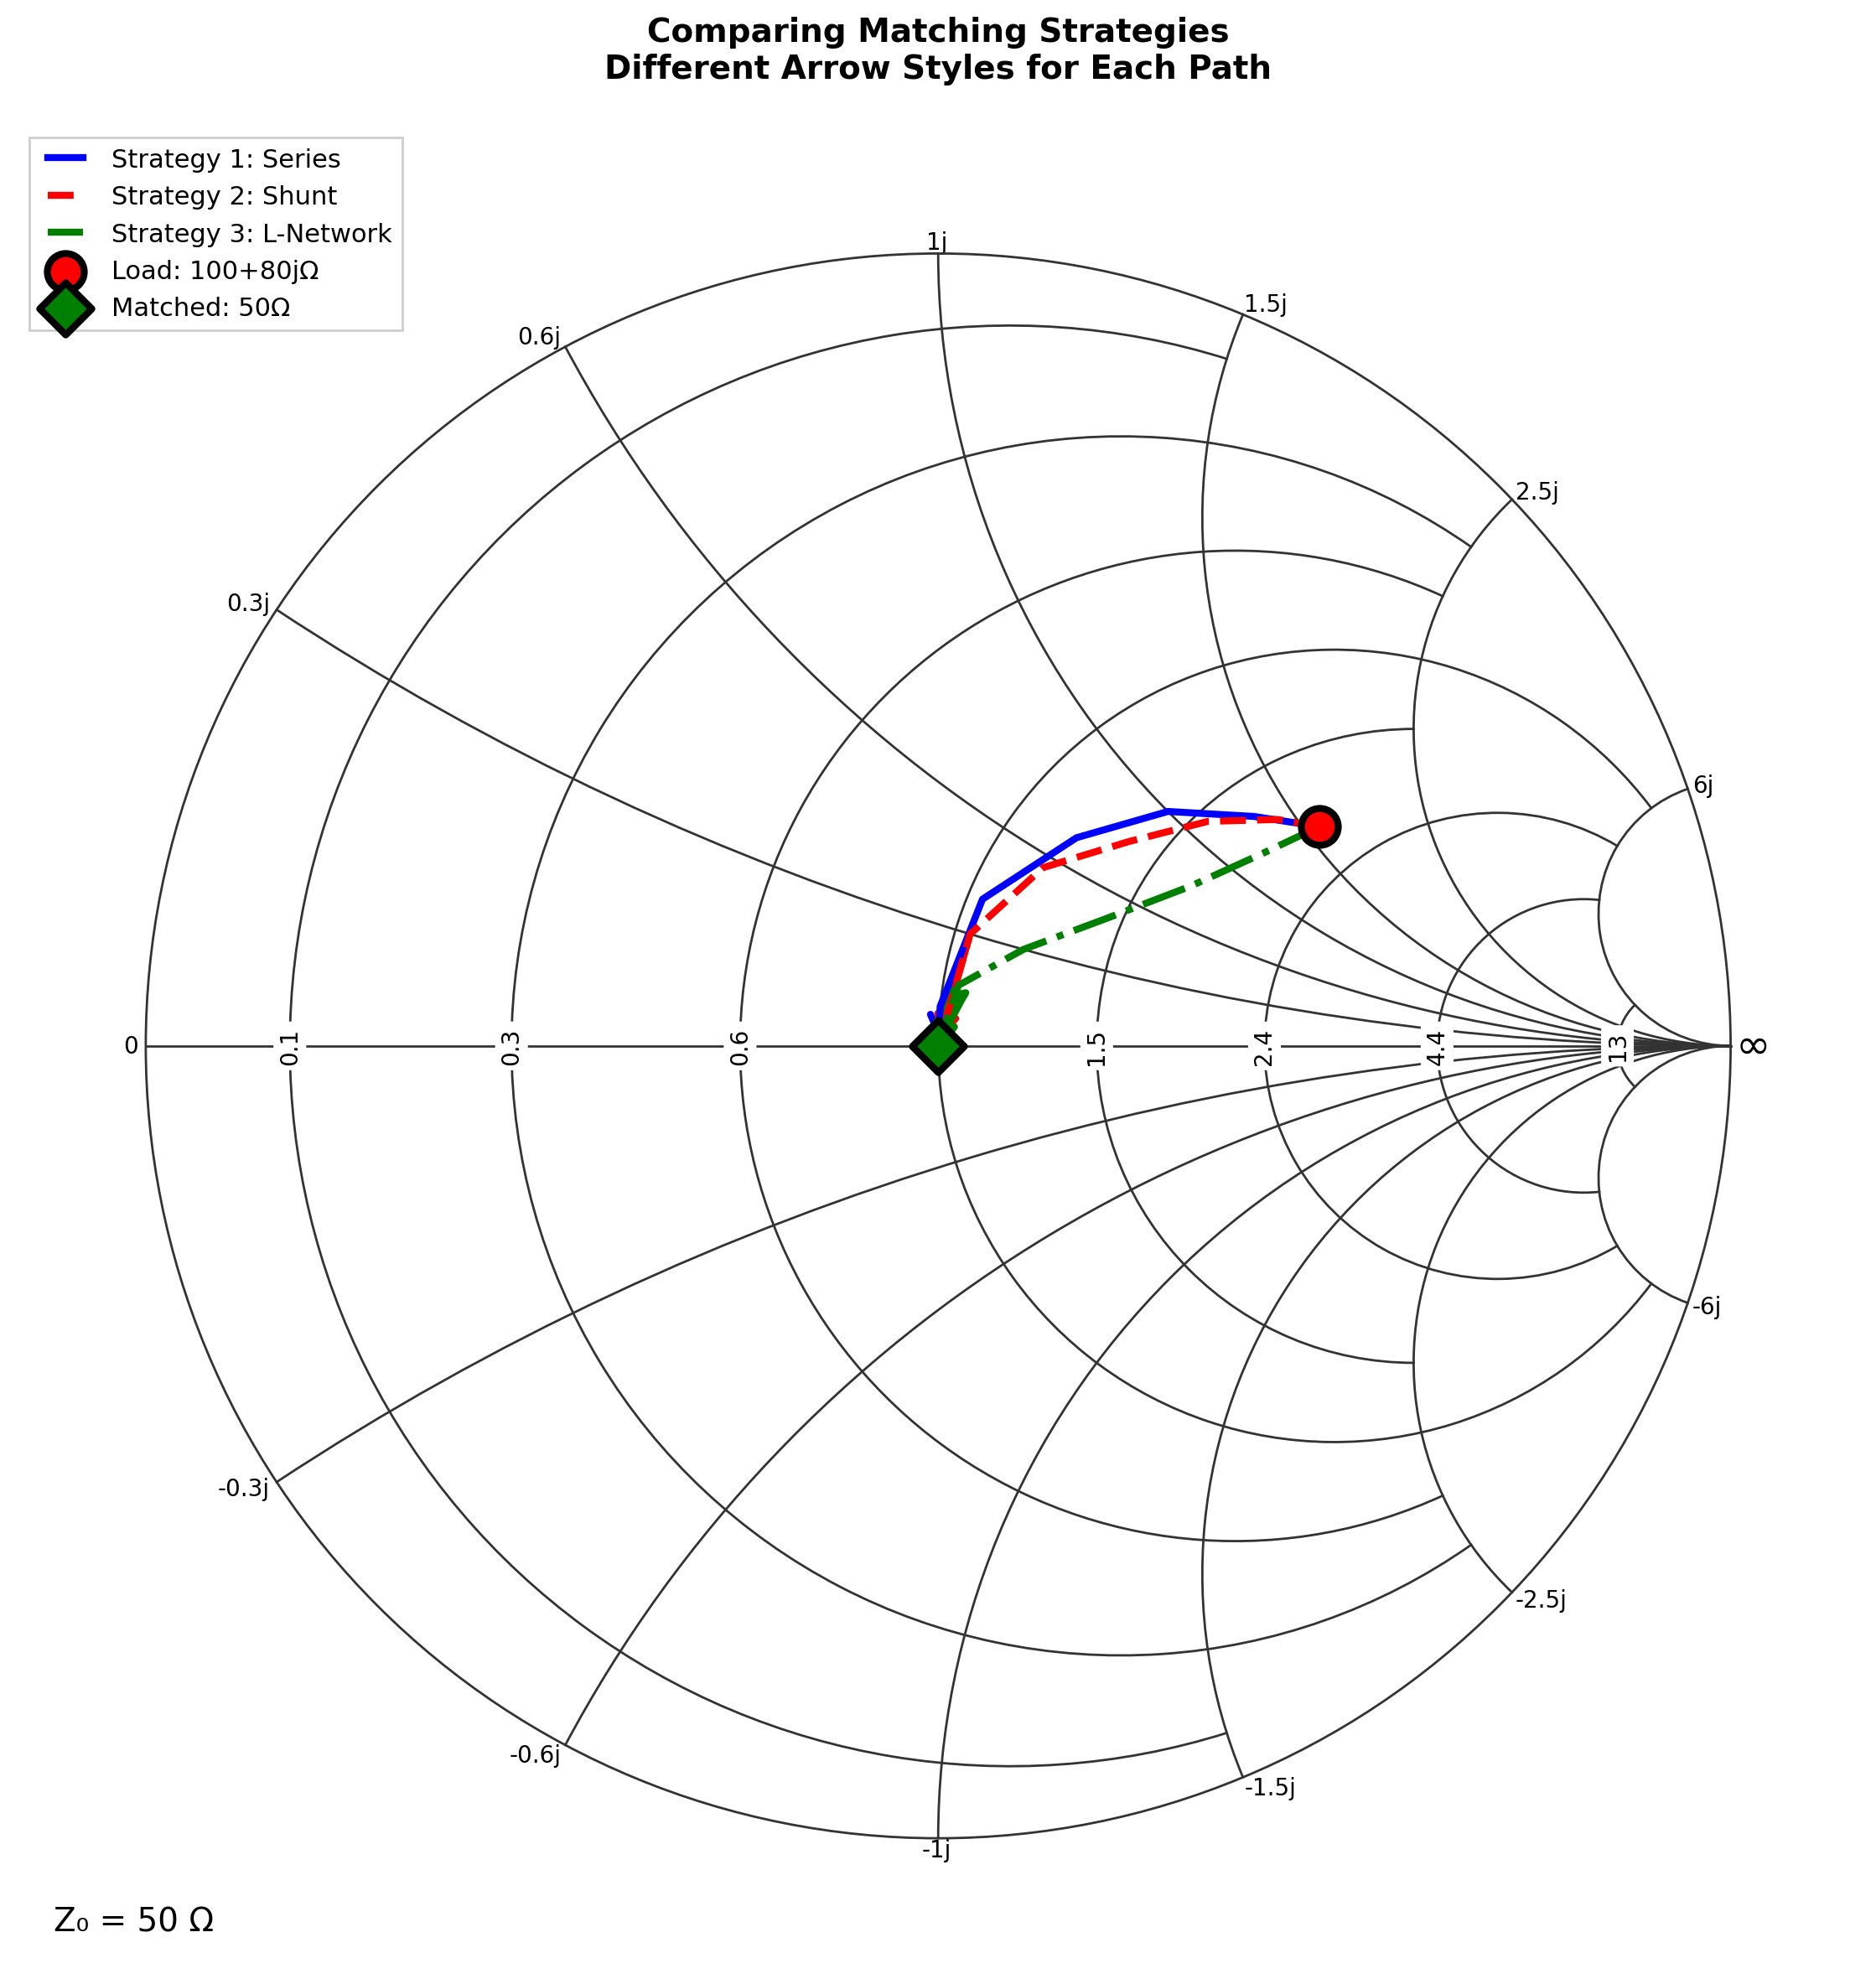

Multiple path visualization:
  Different arrow styles distinguish different strategies
  All paths start at load and end at matched impedance
  Arrows show direction of transformation


In [10]:
# Example 10: Comparing matching strategies
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "smith"})

Z_load = 100 + 80j
Z0 = 50

# Strategy 1: Series matching
Z_series = np.array([100 + 80j, 85 + 65j, 70 + 50j, 60 + 35j, 52 + 20j, 50 + 5j, 50 + 0j])
arrow1 = {"position": "end", "style": "->", "size": 20}
ax.plot(Z_series, "b-", linewidth=3, arrow=arrow1, label="Strategy 1: Series")

# Strategy 2: Shunt matching
Z_shunt = np.array([100 + 80j, 90 + 70j, 78 + 55j, 68 + 40j, 58 + 28j, 52 + 15j, 50 + 0j])
arrow2 = {"position": "end", "style": "-|>", "size": 20}
ax.plot(Z_shunt, "r--", linewidth=3, arrow=arrow2, label="Strategy 2: Shunt")

# Strategy 3: L-network
Z_lnet = np.array([100 + 80j, 95 + 60j, 85 + 40j, 72 + 25j, 60 + 15j, 52 + 8j, 50 + 0j])
arrow3 = {"position": "end", "style": "fancy", "size": 20}
ax.plot(Z_lnet, "g-.", linewidth=3, arrow=arrow3, label="Strategy 3: L-Network")

# Mark start and end
ax.scatter(
    Z_load, c="red", s=250, marker="o", edgecolors="black", linewidths=3, label=f"Load: {Z_load:.0f}Ω", zorder=10
)
ax.scatter(Z0, c="green", s=250, marker="D", edgecolors="black", linewidths=3, label=f"Matched: {Z0}Ω", zorder=10)

ax.legend(loc="upper left", fontsize=11, framealpha=0.95)
ax.set_title(
    "Comparing Matching Strategies\nDifferent Arrow Styles for Each Path", fontsize=14, fontweight="bold", pad=20
)
plt.tight_layout()
plt.show()

print("Multiple path visualization:")
print("  Different arrow styles distinguish different strategies")
print("  All paths start at load and end at matched impedance")
print("  Arrows show direction of transformation")